# Zillow Housing Predictions

## Import necessary packages, classes, and functions

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import metrics
import math
from python.predictor import model_price, create_zip_df, plot_models

%matplotlib inline
plt.style.use('fivethirtyeight')

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## Import data from Zillow Research

In [2]:
all_df = pd.read_csv('raw_data/zillow_data.csv')

## Test error on specific zipcodes for data cleaning purposes

In [3]:
_, _, training_forecast, _ = model_price(all_df, 79936, '2005-04-01', '2016-04-01')
math.sqrt(metrics.mean_squared_error(create_zip_df(all_df, 79936,'2016-04-01', '2018-04-01')['y'],
                           training_forecast.loc[((training_forecast['ds'] > '2016-05-01') & (training_forecast['ds'] < '2018-05-01')), 'yhat']))

1866.780790141378

## Manipulate data into desired groups

In [4]:
no_nan_df = pd.concat([all_df['RegionName'], all_df.loc[:, '2005-04': '2018-04']], axis=1).dropna()

In [5]:
stats_df = pd.read_csv('raw_data/stats.csv')

In [6]:
filtered_stats_df = stats_df.loc[stats_df['zipcode'].isin(no_nan_df['RegionName'])]


## Gather top 5 zipcodes and define for conservative ROI (low risk), expected ROI (highest expecte ROI by median), and high potential ROI (max ROI potential).

In [7]:
conservative5 = filtered_stats_df.nlargest(5, 'min_roi')
conservative5

,Unnamed: 0,zipcode,2018-04-01,minimum,min_roi,expected,expected_roi,maximum,max_roi
6698,0,29601.0,258638.364509,443344.806296,0.714149,489904.265675,0.894167,534706.042342,1.067389
3157,0,75234.0,238714.471709,398796.551429,0.670601,431148.939508,0.806128,470908.002437,0.972683
3795,0,75224.0,154626.016415,258311.031721,0.670553,286294.568517,0.851529,309818.769862,1.003665
7981,0,27601.0,279042.267747,463695.028026,0.661738,503906.684333,0.805844,540607.696879,0.937368
5323,0,75235.0,180698.814712,298489.913875,0.651864,323096.247915,0.788037,349234.995235,0.932691


In [8]:
filtered_stats_df.nlargest(5, 'expected_roi')

,Unnamed: 0,zipcode,2018-04-01,minimum,min_roi,expected,expected_roi,maximum,max_roi
4135,0,33563.0,1.528269e+05,2.206014e+05,0.443472,2.917412e+05,0.908965,3.627985e+05,1.373918
6698,0,29601.0,2.586384e+05,4.433448e+05,0.714149,4.899043e+05,0.894167,5.347060e+05,1.067389
3795,0,75224.0,1.546260e+05,2.583110e+05,0.670553,2.862946e+05,0.851529,3.098188e+05,1.003665
2596,0,32211.0,1.410498e+05,2.119523e+05,0.502677,2.591417e+05,0.837235,3.016168e+05,1.138371
191,0,7302.0,1.525514e+06,2.476980e+06,0.623702,2.802050e+06,0.836791,3.142064e+06,1.059676


In [9]:
filtered_stats_df.nlargest(5, 'max_roi')

,Unnamed: 0,zipcode,2018-04-01,minimum,min_roi,expected,expected_roi,maximum,max_roi
2409,0,33404.0,137212.816327,116412.847291,-0.151589,247852.017539,0.806333,383534.044138,1.795177
3342,0,95210.0,247781.881136,129969.311582,-0.475469,377423.557260,0.523209,639428.097098,1.580609
4149,0,48506.0,21338.510102,4699.588027,-0.779760,29668.391848,0.390368,55042.141680,1.579474
4436,0,33936.0,136771.343623,102384.722369,-0.251417,230583.865098,0.685908,352329.559760,1.576048
1154,0,33068.0,218786.911781,190830.148417,-0.127781,374135.226080,0.710044,561376.101551,1.565858


## Make forecasts for modeling specifying dates and zipcode categories for plotting

In [10]:
conservative_zip_forecasts = {}
for zipcode in conservative5['zipcode'].values:
    _, history_df, forecast_df, zipcode = model_price(all_df, zipcode, '2005-04-01', '2018-04-01')
    conservative_zip_forecasts[zipcode] = {'history': history_df, 'forecast': forecast_df}

## Plot desired forecasts

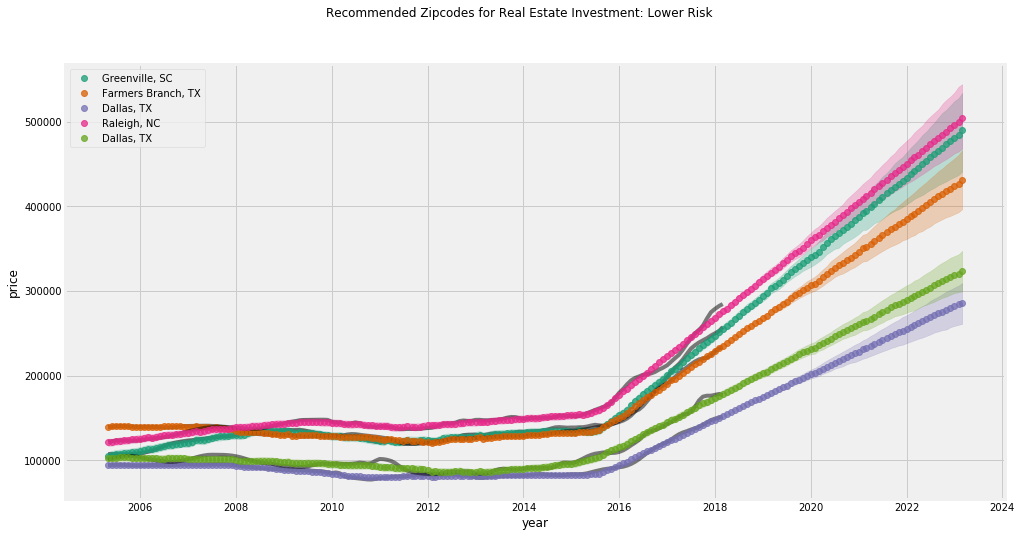

In [11]:
plot_models(all_df, stats_df, conservative_zip_forecasts, 'Lower Risk')